In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import io
import matplotlib.pyplot as plt

%reload_ext google.colab.data_table

In [2]:
#Reading the csv file to get the confirmed cases
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

#Reading the csv file to get the total deaths
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

#Storing the Data into dataframe
confirmed_cases_df = pd.read_csv(confirmed_cases_url)
deaths_df = pd.read_csv(deaths_url)

#aggregating and suming both data frames 
confirmed_cases_global = confirmed_cases_df.groupby(['Country/Region']).sum().reset_index()
deaths_global = deaths_df.groupby(['Country/Region']).sum().reset_index()
global_data = pd.merge(confirmed_cases_global, deaths_global, on='Country/Region', suffixes=('_confirmed', '_deaths'))
print(global_data)

           Country/Region  Lat_confirmed  Long_confirmed  1/22/20_confirmed  \
0             Afghanistan      33.939110       67.709953                  0   
1                 Albania      41.153300       20.168300                  0   
2                 Algeria      28.033900        1.659600                  0   
3                 Andorra      42.506300        1.521800                  0   
4                  Angola     -11.202700       17.873900                  0   
..                    ...            ...             ...                ...   
196    West Bank and Gaza      31.952200       35.233200                  0   
197  Winter Olympics 2022      39.904200      116.407400                  0   
198                 Yemen      15.552727       48.516388                  0   
199                Zambia     -13.133897       27.849332                  0   
200              Zimbabwe     -19.015438       29.154857                  0   

     1/23/20_confirmed  1/24/20_confirmed  1/25/20_

<ipython-input-2-54c0961aeb5e>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  confirmed_cases_global = confirmed_cases_df.groupby(['Country/Region']).sum().reset_index()
<ipython-input-2-54c0961aeb5e>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  deaths_global = deaths_df.groupby(['Country/Region']).sum().reset_index()


In [3]:
#research stock for industries (Overall American, overall Candian, Travel, Real Estate, Precious metals (Gold, Silver, Platinum and so on)) from AlphaVantage API
overall_us_stock = 'SPY' # Overall American Market
overall_ca_stock = 'XIU.TO' # Overall Canadian Market
travel_stock = 'EXPE' # Travel sector (Expedia)
real_estate_stock = 'VNQ' # The Real Estate sector (Vanguard Real Estate ETF)
precious_metals_stock = 'GLD' # Precious metals (Gold ETF)
api_key = 'QJCYHOCEUMEEI17F'
base_url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED'
interval = 'daily'
outputsize = 'compact'
overall_us_stock_url = f"{base_url}&symbol={overall_us_stock}&apikey={api_key}&interval={interval}&outputsize={outputsize}"
overall_ca_stock_url = f"{base_url}&symbol={overall_ca_stock}&apikey={api_key}&interval={interval}&outputsize={outputsize}"
travel_stock_url = f"{base_url}&symbol={travel_stock}&apikey={api_key}&interval={interval}&outputsize={outputsize}"
real_estate_stock_url = f"{base_url}&symbol={real_estate_stock}&apikey={api_key}&interval={interval}&outputsize={outputsize}"
precious_metals_stock_url = f"{base_url}&symbol={precious_metals_stock}&apikey={api_key}&interval={interval}&outputsize={outputsize}"

In [4]:
# get response for overall us stock from API
overall_us_response = requests.get(overall_us_stock_url)
SPY_data = pd.DataFrame.from_dict(overall_us_response.json()['Time Series (Daily)'], orient='index')
SPY_data['Date'] = pd.to_datetime(SPY_data.index)
SPY_data.reset_index(inplace=True)
SPY_data = SPY_data[['Date', '2. high', '3. low']]
SPY_data.columns = ['Date', 'SPY_High', 'SPY_Low']

In [5]:
# get response for overall canada stock from API
overall_ca_response = requests.get(overall_ca_stock_url)
XIU_data = pd.DataFrame.from_dict(overall_ca_response.json()['Time Series (Daily)'], orient='index')
XIU_data['Date'] = pd.to_datetime(XIU_data.index)
XIU_data.reset_index(inplace=True)
XIU_data = XIU_data[['Date', '2. high', '3. low']]
XIU_data.columns = ['Date', 'XIU_High', 'XIU_Low']

In [6]:
# get response for travel stock for Expedia from API
travel_response = requests.get(travel_stock_url)
EXPE_data = pd.DataFrame.from_dict(travel_response.json()['Time Series (Daily)'], orient='index')
EXPE_data['Date'] = pd.to_datetime(EXPE_data.index)
EXPE_data.reset_index(inplace=True)
EXPE_data = EXPE_data[['Date', '2. high', '3. low']]
EXPE_data.columns = ['Date', 'EXPE_High', 'EXPE_Low']

In [7]:
# get response for Vanguard Real Estate stock  from API
real_estate_response = requests.get(real_estate_stock_url)
VNQ_data = pd.DataFrame.from_dict(real_estate_response.json()['Time Series (Daily)'], orient='index')
VNQ_data['Date'] = pd.to_datetime(VNQ_data.index)
VNQ_data.reset_index(inplace=True)
VNQ_data = VNQ_data[['Date', '2. high', '3. low']]
VNQ_data.columns = ['Date', 'VNQ_High', 'VNQ_Low']

In [9]:
# get response for precious metal such as gold stock  from API
precious_metals_response = requests.get(precious_metals_stock_url)
GOLD_data = pd.DataFrame.from_dict(precious_metals_response.json()['Time Series (Daily)'], orient='index')
GOLD_data['Date'] = pd.to_datetime(GOLD_data.index)
GOLD_data.reset_index(inplace=True)
GOLD_data = GOLD_data[['Date', '2. high', '3. low']]
GOLD_data.columns = ['Date', 'GLD_High', 'GLD_Low']

In [10]:
# combined data for all API response
combined_data = pd.concat([global_data,SPY_data, XIU_data, EXPE_data, VNQ_data, GOLD_data], axis=1)
print(combined_data)
combined_data.to_excel("output.xlsx",sheet_name='Sheet_name_1') 

           Country/Region  Lat_confirmed  Long_confirmed  1/22/20_confirmed  \
0             Afghanistan      33.939110       67.709953                  0   
1                 Albania      41.153300       20.168300                  0   
2                 Algeria      28.033900        1.659600                  0   
3                 Andorra      42.506300        1.521800                  0   
4                  Angola     -11.202700       17.873900                  0   
..                    ...            ...             ...                ...   
196    West Bank and Gaza      31.952200       35.233200                  0   
197  Winter Olympics 2022      39.904200      116.407400                  0   
198                 Yemen      15.552727       48.516388                  0   
199                Zambia     -13.133897       27.849332                  0   
200              Zimbabwe     -19.015438       29.154857                  0   

     1/23/20_confirmed  1/24/20_confirmed  1/25/20_

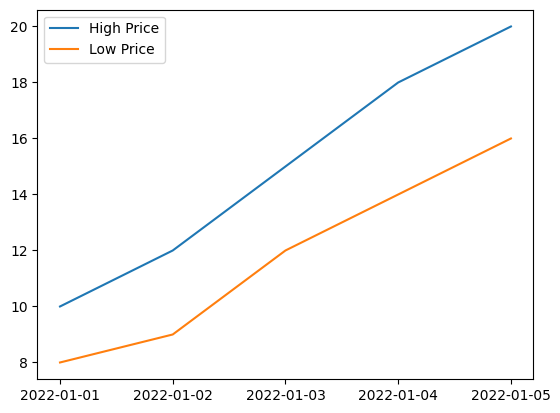

In [13]:
# Defining the stock data
stock_data = pd.DataFrame({'High': [10, 12, 15, 18, 20],
                           'Low': [8, 9, 12, 14, 16]},
                          index=['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05'])

# Ploting the data using the line graph
fig, ax = plt.subplots()
ax.plot(stock_data.index, stock_data['High'], label='High Price')
ax.plot(stock_data.index, stock_data['Low'], label='Low Price')
ax.legend()
plt.show()

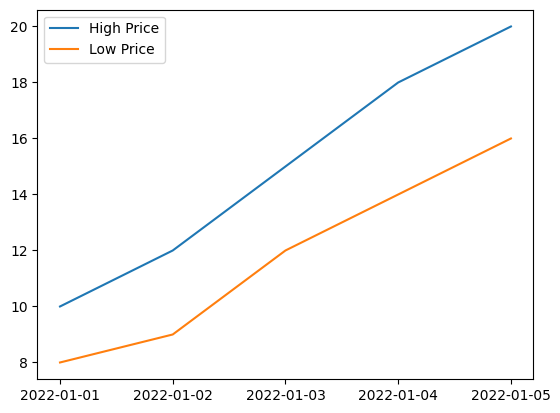

In [14]:
# Defining the stock data
stock_data = pd.DataFrame({'High': [10, 12, 15, 18, 20],
                           'Low': [8, 9, 12, 14, 16]},
                          index=['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05'])

# Ploting the data using the line graph
fig, ax = plt.subplots()
ax.plot(stock_data.index, stock_data['High'], label='High Price')
ax.plot(stock_data.index, stock_data['Low'], label='Low Price')
ax.legend()
plt.show()